# Data Analysis

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import datasets
t_train=pd.read_csv('../input/titanic/train.csv')
t_test=pd.read_csv('../input/titanic/test.csv')

In [3]:
# Function for grouped bar chart
def grouped_bar_chart(labels,set1,set2):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, set1, width, label='Dead') # rectangles for the dead
    rects2 = ax.bar(x + width/2, set2, width, label='Survived') # rectangles for the survived
    
    ax.set_ylabel('Number of people')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

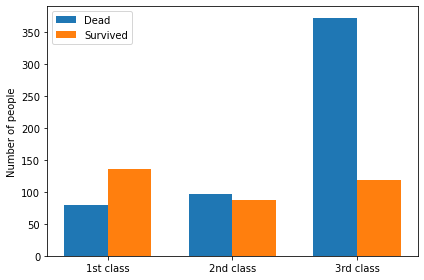

In [4]:
# grouping data by surviving and the class
gr=t_train[['Survived','Pclass','PassengerId']].groupby(['Survived','Pclass']).count()
gr=gr.reset_index()
grouped_bar_chart(['1st class', '2nd class', '3rd class'],
                  gr[gr['Survived']==0]['PassengerId'],
                  gr[gr['Survived']==1]['PassengerId'])

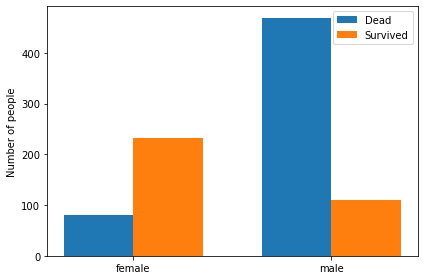

In [5]:
# grouping data by surviving and the sex

gr=t_train[['Survived','Sex','PassengerId']].groupby(['Survived','Sex']).count()
gr=gr.reset_index()
grouped_bar_chart(gr[gr['Survived']==0]['Sex'],
                  gr[gr['Survived']==0]['PassengerId'],
                  gr[gr['Survived']==1]['PassengerId'])

In [6]:
# grouping data by surviving and the number of siblings and spouses

gr=t_train[['Survived','SibSp','PassengerId']].groupby(['Survived','SibSp']).count()
gr

PassengerId
Survived SibSp             
0        0              398
         1               97
         2               15
         3               12
         4               15
         5                5
         8                7
1        0              210
         1              112
         2               13
         3                4
         4                3

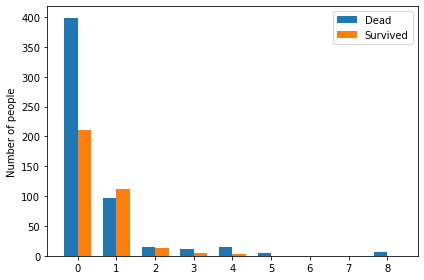

In [7]:
gr=gr.reset_index()
# The number of groups is different for survived=0 and survived=0. Therefore I add missing rows to create a plot.
for i in range(0,2):
    for j in range(1,9):
        if len(gr[(gr['Survived']==i)&(gr['SibSp']==j)])==0:
            gr=gr.append({'Survived':i,'SibSp':j,'PassengerId':0},ignore_index=True)
gr=gr.sort_values(by=['Survived','SibSp'])
grouped_bar_chart(gr[gr['Survived']==0]['SibSp'],
                  gr[gr['Survived']==0]['PassengerId'],
                  gr[gr['Survived']==1]['PassengerId'])

In [8]:
gr=t_train[['Survived','Parch','PassengerId']].groupby(['Survived','Parch']).count()
gr

PassengerId
Survived Parch             
0        0              445
         1               53
         2               40
         3                2
         4                4
         5                4
         6                1
1        0              233
         1               65
         2               40
         3                3
         5                1

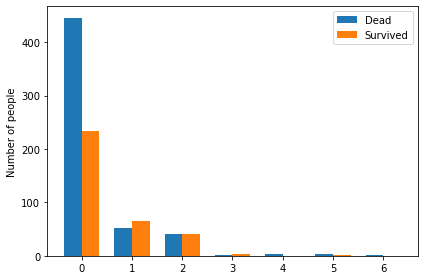

In [9]:
gr=gr.reset_index()
# The number of groups is different for survived=0 and survived=0. Therefore I add missing rows to create a plot.
gr=gr.append({'Survived':1,'Parch':4,'PassengerId':0},ignore_index=True)
gr=gr.append({'Survived':1,'Parch':6,'PassengerId':0},ignore_index=True)
gr=gr.sort_values(by=['Survived','Parch'])
grouped_bar_chart(gr[gr['Survived']==0]['Parch'],
                  gr[gr['Survived']==0]['PassengerId'],
                  gr[gr['Survived']==1]['PassengerId'])

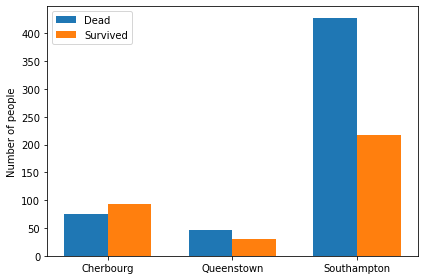

In [10]:
gr=t_train[['Survived','Embarked','PassengerId']].groupby(['Survived','Embarked']).count()
gr=gr.reset_index()
grouped_bar_chart(['Cherbourg','Queenstown','Southampton'],
                  gr[gr['Survived']==0]['PassengerId'],
                  gr[gr['Survived']==1]['PassengerId'])

In [11]:
t_train['Title']=t_train['Name'].str.extract(r',\s?(.+?)\.\s')
t_test['Title']=t_test['Name'].str.extract(r',\s?(.+?)\.\s')

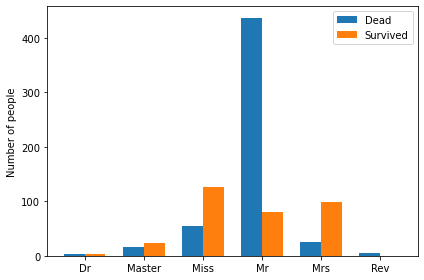

In [12]:
gr=t_train[['Survived','Title','PassengerId']].groupby(['Survived','Title']).count()
gr=gr.reset_index()
# I only show groups with more than 3 people
gr=gr[gr['PassengerId']>=3]
gr=gr.append({'Survived':1,'Title':'Rev','PassengerId':0},ignore_index=True)
grouped_bar_chart(gr[gr['Survived']==0]['Title'],
                  gr[gr['Survived']==0]['PassengerId'],
                  gr[gr['Survived']==1]['PassengerId'])

In [13]:
t_train[['Fare','Survived']].groupby(['Survived']).median()

,Fare
Survived,
0,10.5
1,26.0
